In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
!pip install -Uqq fastai

In [3]:
from fastai.vision.all import *

In [7]:
# def get_image_files(path):
#   """
#   This function retrieves image file paths within the nested folder structure.
#   Args:
#       path: Path to the root directory containing the dataset.
#   Returns:
#       A list of tuples, where each tuple contains the image path and its category.
#   """
#   items = []
#   # Loop through each category folder (e.g., AiArtData, RealArt)
#   for category in path.glob("*"):
#     if category.is_dir():
#       # Loop through each image file within the category folder
#       for img_path in category.glob("**/*.jpg"):  # Adjust file extension if needed
#         # Extract category name from the folder name
#         category_name = category.name
#         items.append((str(img_path), category_name))
#   return items

In [8]:
# def parent_label(path):
#   """
#   This function extracts the full path of the parent folder as the label.
#   Args:
#       path: Path to the image file.
#   Returns:
#       The full path of the parent folder.
#   """
#   return str(path.parent)

In [20]:
path = Path('aivsreal')
def get_category(x):
    return x.parent.parent.name
# Define your DataBlock
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),  # Image input, multi-class category output
    get_items=get_image_files,           # Function to get image files
    get_y=get_category,  # Function to label the data based on the grandparent folder name
    splitter=RandomSplitter(valid_pct=0.2, seed=42),  # Random split for validation
    item_tfms=RandomResizedCrop(224, min_scale=0.8),  # Resize and crop images
    batch_tfms=[*aug_transforms(), Normalize.from_stats(*imagenet_stats)]  # Data augmentation and normalization
)
dls = dblock.dataloaders(path, bs=16)


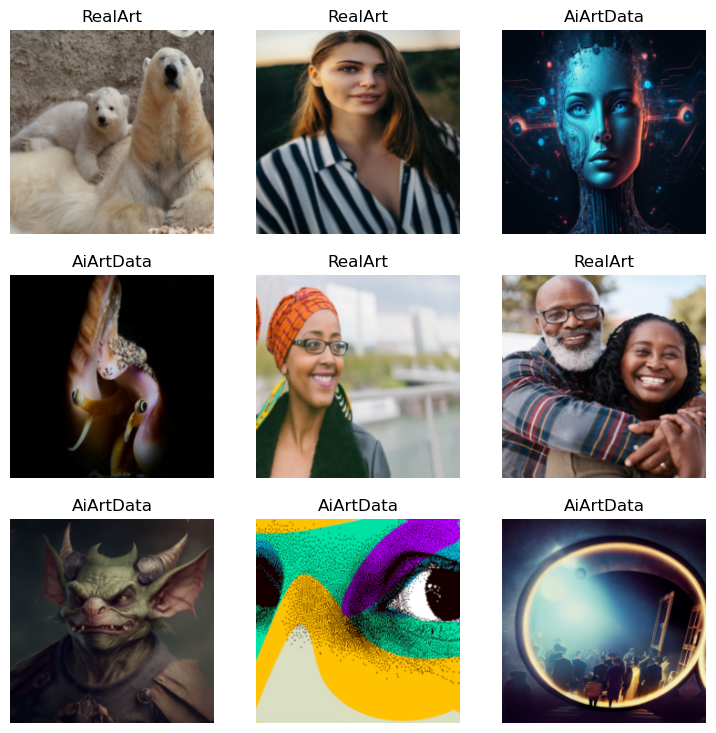

In [5]:
dls.show_batch()


epoch,train_loss,valid_loss,error_rate,time
0,1.210393,0.777202,0.264249,00:09


/home/rayeed/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/rayeed/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


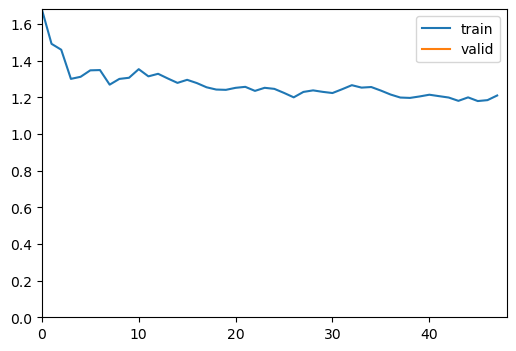

epoch,train_loss,valid_loss,error_rate,time
0,0.718129,0.662308,0.238342,00:07
1,0.545293,0.604540,0.202073,00:07
2,0.461184,0.667506,0.238342,00:06
3,0.430926,0.851257,0.248705,00:05
4,0.388629,0.639421,0.202073,00:06
5,0.336139,0.617217,0.222798,00:06
6,0.287208,0.634798,0.233161,00:06


/home/rayeed/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/rayeed/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


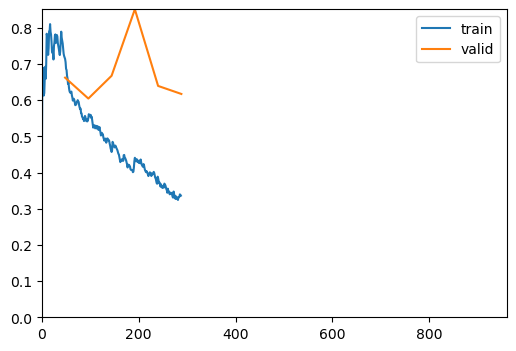

/home/rayeed/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/rayeed/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/rayeed/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/rayeed/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/rayeed/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/rayeed/mambaforge/lib/python3.10/site-packages/PIL/Ima

No improvement since epoch 1: early stopping


In [6]:
learn = vision_learner(dls, resnet34, metrics=error_rate,cbs=[EarlyStoppingCallback(patience=5), ShowGraphCallback(),SaveModelCallback(every_epoch=True,fname='resnet34_model')])
learn.fine_tune(20)     

/home/rayeed/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/home/rayeed/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


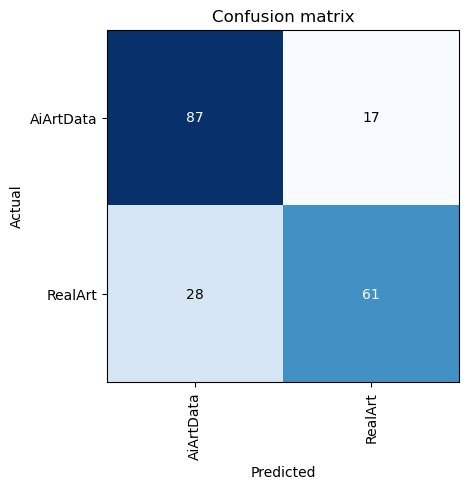

In [7]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

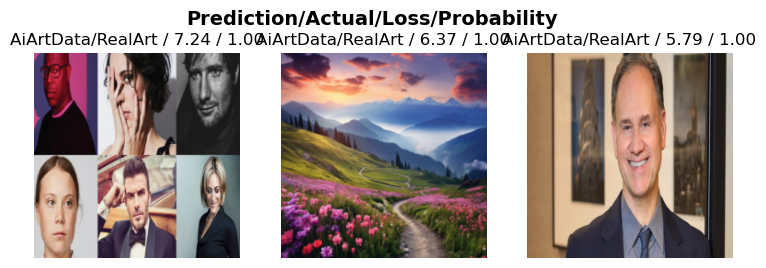

In [8]:
interp.plot_top_losses(3, nrows=1)

In [10]:
from fastai.vision.widgets import *

In [11]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/home/rayeed/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/home/rayeed/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [12]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

epoch,train_loss,valid_loss,error_rate,time
0,1.055823,0.746298,0.290155,00:06


/home/rayeed/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/rayeed/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


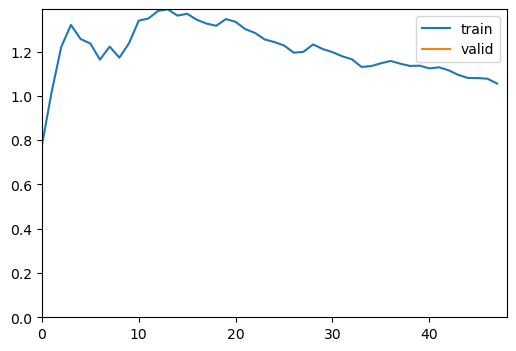

epoch,train_loss,valid_loss,error_rate,time
0,0.773551,0.488785,0.202073,00:06
1,0.574420,0.496473,0.191710,00:06
2,0.463159,0.484708,0.145078,00:06
3,0.398289,0.520489,0.191710,00:06
4,0.313923,0.671136,0.170984,00:06
5,0.320699,0.532720,0.181347,00:06
6,0.265208,0.564175,0.186529,00:06
7,0.233434,0.670123,0.165803,00:06


/home/rayeed/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/rayeed/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


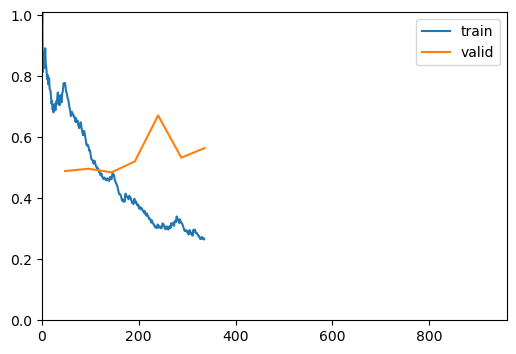

/home/rayeed/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/rayeed/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/rayeed/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/rayeed/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/rayeed/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/rayeed/mambaforge/lib/python3.10/site-packages/PIL/Ima

No improvement since epoch 2: early stopping


In [22]:
learn = vision_learner(dls, resnet34, metrics=error_rate,cbs=[EarlyStoppingCallback(patience=5), ShowGraphCallback(),SaveModelCallback(every_epoch=True,fname='resnet34_model')])
learn.fine_tune(20)

/home/rayeed/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/home/rayeed/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


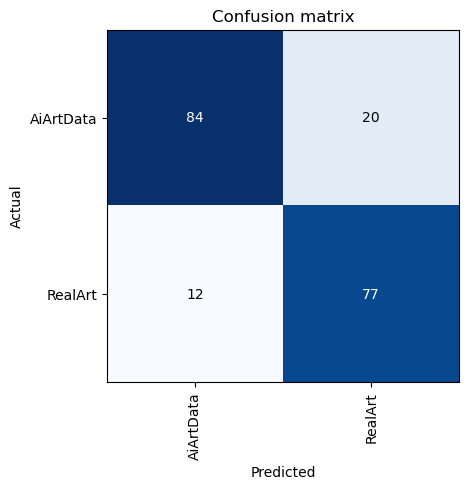

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [18]:
learn.load('resnet34_model_1')

/home/rayeed/mambaforge/lib/python3.10/site-packages/fastai/learner.py:59: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


In [24]:
learn.export('model.pkl')